Fit Implementation

In [1]:
from pylab import *

In [2]:
def f(x):
    return x

In [29]:
def myplot(F,a,b):
    '''makes plots'''
    xs=linspace(a,b,1000)
    ys=[F(x) for x in xs]
    plot(xs,ys)

$A.c = b$

$A_{ij}= \sum_1 x_1^{i+j}$

$b_i = \sum_1 x_1^i y_1$

then the fit function (polynomial) is

$f(x)= c_0+c_1 x+\dot + c_m x^m$

In [30]:
xs=array([1.,2.,3.,4.])
ys=array([3.,1.,2.,5.]) # some sample data

In [31]:
m=2 # degree of the resulting function 
# first compute the vector b
b=zeros(m+1)
b

array([0., 0., 0.])

In [32]:
b[1]=1
b

array([0., 1., 0.])

$b_i = \sum_1 x_1^i y_1$

In [33]:
# compute the entries of b
for i in range(m+1):
    b[i]=sum(ys*(xs**i))

$A_{ij}= \sum_1 x_1^{i+j}$

In [34]:
# compute the entries of A
A=zeros([m+1,m+1])
for i in range(m+1):
    for j in range(m+1):
        A[i,j] = sum(xs**(i+j))

In [35]:
# A.c=b
c=linalg.solve(A,b)

$f(x)= c_0+c_1 x+\dot + c_m x^m$

In [36]:
10**arange(m+1)

array([  1,  10, 100])

In [37]:
def fit(x):
    return sum(c*x**arange(m+1))

In [38]:
fit(1)

2.949999999999995

In [39]:
from matplotlib.pyplot import *

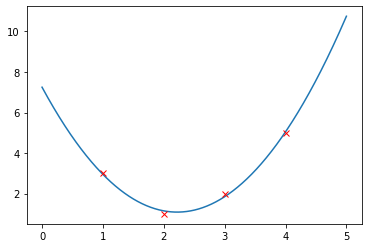

In [43]:
myplot(fit,0,5)
plot(xs,ys,"rx")
show()

In [45]:
# building all parts together
def findfit(m,xs,ys):
    b=zeros(m+1)
    for i in range(m+1):
        b[i]=sum(ys*xs**i)
    A=zeros([m+1,m+1])
    for i in range(m+1):
        for j in range(m+1):
            A[i,j]=sum(xs**(i+j))
    c=linalg.solve(A,b)
    def fit(x):
        return sum(c*x**arange(m+1))
    return fit

In [46]:
myfit=findfit(3,xs,ys)

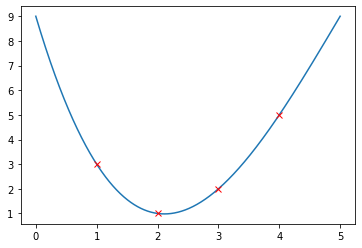

In [49]:
myplot(myfit,0,5)
plot(xs,ys,"rx")

Global Warming?

In [52]:
link="https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/oxforddata.txt"

In [53]:
import requests # needed to convert Python into a web browser

In [54]:
data=requests.get(link).text

In [55]:
datalist=data.split('\r\n')

In [58]:
line = datalist[9].replace('  ',' ').replace('  ',' ').replace('  ',' ').split(' ')

In [59]:
int(line[1])+int(line[2])/12,float(line[6])

(1853.25, 25.9)

In [60]:
xdata=[]
ydata=[]
for i in range(9,len(datalist)):
    line = datalist[i].replace('  ',' ').replace('  ',' ').replace('  ',' ').replace('*','').split(' ')
    xdata.append(int(line[1])+ int(line[2])/12)
    ydata.append(float(line[3]))

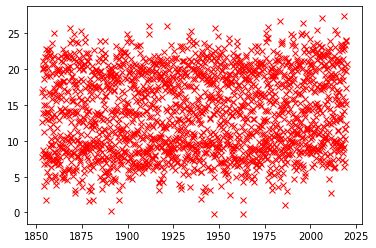

In [63]:
plot(xdata,ydata,"rx")

In [64]:
tfit=findfit(3,array(xdata),array(ydata))

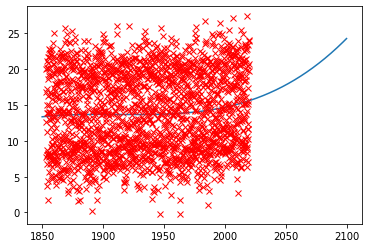

In [65]:
myplot(tfit,1850,2100)
plot(xdata,ydata,"rx")

In [66]:
tfit(2019)-tfit(1850)

2.189028552864329

In [67]:
tfit(2119)-tfit(2019)

12.33521585157905